In [231]:
import dgl
import numpy as np
import torch

%load_ext autoreload
%autoreload 2
import espaloma as esp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
! git pull

Already up to date.


In [242]:
g = esp.Graph('C')

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [243]:
forcefield = esp.graphs.legacy_force_field.LegacyForceField(
    "smirnoff99Frosst"
)

forcefield.parametrize(g)

In [244]:
from espaloma.data.md import MoleculeVacuumSimulation
simulation = MoleculeVacuumSimulation(
    n_samples=100,
    n_steps_per_sample=10,
)
simulation.run(g)

In [245]:
representation = esp.nn.baselines.FreeParameterBaseline(g_ref=g.heterograph)

net = torch.nn.Sequential(
        representation, 
        esp.mm.geometry.GeometryInGraph(),
        esp.mm.energy.EnergyInGraph(),
        esp.mm.energy.EnergyInGraph(suffix='_ref'),
)

optimizer = torch.optim.Adam(
    net.parameters(),
    0.1,
)

# optimizer = torch.optim.LBFGS(
#     net.parameters(),
#     0.1,
#     line_search_fn='strong_wolfe',
# )

In [246]:
for _ in range(1000):
    optimizer.zero_grad()
    
    def l():
        net(g.heterograph)
        loss = torch.nn.MSELoss()(
            g.nodes['g'].data['u'],
            g.nodes['g'].data['u_ref'],
        )

        loss = loss.sum()
        
        loss.backward()
        
        print(loss)
        return loss
    
    optimizer.step(l)

tensor(100.6774, grad_fn=<SumBackward0>)
tensor(79.2319, grad_fn=<SumBackward0>)
tensor(58.4869, grad_fn=<SumBackward0>)
tensor(42.1533, grad_fn=<SumBackward0>)
tensor(36.4708, grad_fn=<SumBackward0>)
tensor(45.9872, grad_fn=<SumBackward0>)
tensor(53.1341, grad_fn=<SumBackward0>)
tensor(49.2596, grad_fn=<SumBackward0>)
tensor(42.2254, grad_fn=<SumBackward0>)
tensor(37.5495, grad_fn=<SumBackward0>)
tensor(36.3516, grad_fn=<SumBackward0>)
tensor(37.4729, grad_fn=<SumBackward0>)
tensor(39.3736, grad_fn=<SumBackward0>)
tensor(40.9672, grad_fn=<SumBackward0>)
tensor(41.7310, grad_fn=<SumBackward0>)
tensor(41.5644, grad_fn=<SumBackward0>)
tensor(40.6342, grad_fn=<SumBackward0>)
tensor(39.2634, grad_fn=<SumBackward0>)
tensor(37.8494, grad_fn=<SumBackward0>)
tensor(36.7829, grad_fn=<SumBackward0>)
tensor(36.3449, grad_fn=<SumBackward0>)
tensor(36.5938, grad_fn=<SumBackward0>)
tensor(37.3000, grad_fn=<SumBackward0>)
tensor(38.0239, grad_fn=<SumBackward0>)
tensor(38.3527, grad_fn=<SumBackward0>)

tensor(36.2760, grad_fn=<SumBackward0>)
tensor(36.2757, grad_fn=<SumBackward0>)
tensor(36.2754, grad_fn=<SumBackward0>)
tensor(36.2751, grad_fn=<SumBackward0>)
tensor(36.2749, grad_fn=<SumBackward0>)
tensor(36.2746, grad_fn=<SumBackward0>)
tensor(36.2743, grad_fn=<SumBackward0>)
tensor(36.2740, grad_fn=<SumBackward0>)
tensor(36.2737, grad_fn=<SumBackward0>)
tensor(36.2735, grad_fn=<SumBackward0>)
tensor(36.2732, grad_fn=<SumBackward0>)
tensor(36.2729, grad_fn=<SumBackward0>)
tensor(36.2726, grad_fn=<SumBackward0>)
tensor(36.2724, grad_fn=<SumBackward0>)
tensor(36.2721, grad_fn=<SumBackward0>)
tensor(36.2718, grad_fn=<SumBackward0>)
tensor(36.2716, grad_fn=<SumBackward0>)
tensor(36.2713, grad_fn=<SumBackward0>)
tensor(36.2710, grad_fn=<SumBackward0>)
tensor(36.2708, grad_fn=<SumBackward0>)
tensor(36.2705, grad_fn=<SumBackward0>)
tensor(36.2702, grad_fn=<SumBackward0>)
tensor(36.2700, grad_fn=<SumBackward0>)
tensor(36.2697, grad_fn=<SumBackward0>)
tensor(36.2695, grad_fn=<SumBackward0>)


tensor(36.2338, grad_fn=<SumBackward0>)
tensor(36.2337, grad_fn=<SumBackward0>)
tensor(36.2335, grad_fn=<SumBackward0>)
tensor(36.2333, grad_fn=<SumBackward0>)
tensor(36.2332, grad_fn=<SumBackward0>)
tensor(36.2330, grad_fn=<SumBackward0>)
tensor(36.2328, grad_fn=<SumBackward0>)
tensor(36.2327, grad_fn=<SumBackward0>)
tensor(36.2325, grad_fn=<SumBackward0>)
tensor(36.2323, grad_fn=<SumBackward0>)
tensor(36.2322, grad_fn=<SumBackward0>)
tensor(36.2320, grad_fn=<SumBackward0>)
tensor(36.2318, grad_fn=<SumBackward0>)
tensor(36.2317, grad_fn=<SumBackward0>)
tensor(36.2315, grad_fn=<SumBackward0>)
tensor(36.2313, grad_fn=<SumBackward0>)
tensor(36.2312, grad_fn=<SumBackward0>)
tensor(36.2310, grad_fn=<SumBackward0>)
tensor(36.2308, grad_fn=<SumBackward0>)
tensor(36.2307, grad_fn=<SumBackward0>)
tensor(36.2305, grad_fn=<SumBackward0>)
tensor(36.2303, grad_fn=<SumBackward0>)
tensor(36.2302, grad_fn=<SumBackward0>)
tensor(36.2300, grad_fn=<SumBackward0>)
tensor(36.2298, grad_fn=<SumBackward0>)


tensor(36.1852, grad_fn=<SumBackward0>)
tensor(36.1848, grad_fn=<SumBackward0>)
tensor(36.1845, grad_fn=<SumBackward0>)
tensor(36.1841, grad_fn=<SumBackward0>)
tensor(36.1837, grad_fn=<SumBackward0>)
tensor(36.1834, grad_fn=<SumBackward0>)
tensor(36.1830, grad_fn=<SumBackward0>)
tensor(36.1826, grad_fn=<SumBackward0>)
tensor(36.1822, grad_fn=<SumBackward0>)
tensor(36.1818, grad_fn=<SumBackward0>)
tensor(36.1815, grad_fn=<SumBackward0>)
tensor(36.1811, grad_fn=<SumBackward0>)
tensor(36.1807, grad_fn=<SumBackward0>)
tensor(36.1803, grad_fn=<SumBackward0>)
tensor(36.1799, grad_fn=<SumBackward0>)
tensor(36.1795, grad_fn=<SumBackward0>)
tensor(36.1791, grad_fn=<SumBackward0>)
tensor(36.1787, grad_fn=<SumBackward0>)
tensor(36.1782, grad_fn=<SumBackward0>)
tensor(36.1778, grad_fn=<SumBackward0>)
tensor(36.1774, grad_fn=<SumBackward0>)
tensor(36.1770, grad_fn=<SumBackward0>)
tensor(36.1766, grad_fn=<SumBackward0>)
tensor(36.1761, grad_fn=<SumBackward0>)
tensor(36.1757, grad_fn=<SumBackward0>)


tensor(793.3267, grad_fn=<SumBackward0>)
tensor(82.6938, grad_fn=<SumBackward0>)
tensor(126.3800, grad_fn=<SumBackward0>)
tensor(65.8354, grad_fn=<SumBackward0>)
tensor(41.6665, grad_fn=<SumBackward0>)
tensor(61.1442, grad_fn=<SumBackward0>)
tensor(82.9133, grad_fn=<SumBackward0>)
tensor(83.0657, grad_fn=<SumBackward0>)
tensor(67.8541, grad_fn=<SumBackward0>)
tensor(51.6681, grad_fn=<SumBackward0>)
tensor(41.5746, grad_fn=<SumBackward0>)
tensor(37.8732, grad_fn=<SumBackward0>)
tensor(38.4396, grad_fn=<SumBackward0>)
tensor(41.1362, grad_fn=<SumBackward0>)
tensor(44.4483, grad_fn=<SumBackward0>)
tensor(47.3945, grad_fn=<SumBackward0>)
tensor(49.2509, grad_fn=<SumBackward0>)
tensor(49.1926, grad_fn=<SumBackward0>)
tensor(45.7737, grad_fn=<SumBackward0>)
tensor(38.0043, grad_fn=<SumBackward0>)
tensor(54.6485, grad_fn=<SumBackward0>)
tensor(36.9621, grad_fn=<SumBackward0>)
tensor(38.7853, grad_fn=<SumBackward0>)
tensor(41.7234, grad_fn=<SumBackward0>)
tensor(41.8556, grad_fn=<SumBackward0>

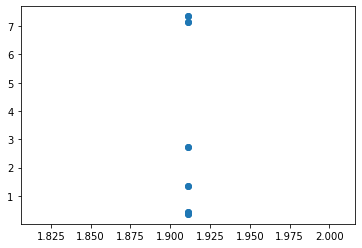

In [247]:
from matplotlib import pyplot as plt
plt.scatter(
    g.nodes['n3'].data['eq_ref'].detach(),
    g.nodes['n3'].data['eq'].detach()
)